In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

# Import the datetime module from the datetime library.
from datetime import datetime

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

622

In [5]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=14f9f957d35fd96630532f072cebe0bc


In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1


# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | albany
Processing Record 2 of Set 1 | los llanos de aridane
Processing Record 3 of Set 1 | kaitangata
Processing Record 4 of Set 1 | hermanus
Processing Record 5 of Set 1 | mar del plata
Processing Record 6 of Set 1 | campeche
Processing Record 7 of Set 1 | mayo
Processing Record 8 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 9 of Set 1 | luwuk
Processing Record 10 of Set 1 | puerto ayora
Processing Record 11 of Set 1 | cherskiy
Processing Record 12 of Set 1 | atuona
Processing Record 13 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 14 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 15 of Set 1 | rikitea
Processing Record 16 of Set 1 | nikolayevka
Processing Record 17 of Set 1 | saint-philippe
Processing Record 18 of Set 1 | ushuaia
Processing Record 19 of Set 1 | nikolskoye
Processing Record 20 of Set 1 | flinders
Processi

Processing Record 35 of Set 4 | oranjestad
Processing Record 36 of Set 4 | victoria
Processing Record 37 of Set 4 | clive
Processing Record 38 of Set 4 | port lincoln
Processing Record 39 of Set 4 | mogadishu
Processing Record 40 of Set 4 | palasbari
Processing Record 41 of Set 4 | guerrero negro
Processing Record 42 of Set 4 | saint-augustin
Processing Record 43 of Set 4 | beringovskiy
Processing Record 44 of Set 4 | goure
Processing Record 45 of Set 4 | attawapiskat
City not found. Skipping...
Processing Record 46 of Set 4 | dinsor
City not found. Skipping...
Processing Record 47 of Set 4 | manavalakurichi
Processing Record 48 of Set 4 | cabedelo
Processing Record 49 of Set 4 | porto novo
Processing Record 50 of Set 4 | yinchuan
Processing Record 1 of Set 5 | poya
Processing Record 2 of Set 5 | ostersund
Processing Record 3 of Set 5 | yangjiang
Processing Record 4 of Set 5 | te anau
Processing Record 5 of Set 5 | bandarbeyla
Processing Record 6 of Set 5 | pietarsaari
City not found. 

Processing Record 24 of Set 8 | jiddah
City not found. Skipping...
Processing Record 25 of Set 8 | severiano melo
Processing Record 26 of Set 8 | garowe
Processing Record 27 of Set 8 | pokrovka
Processing Record 28 of Set 8 | san nicolas
Processing Record 29 of Set 8 | dekoa
City not found. Skipping...
Processing Record 30 of Set 8 | dunedin
Processing Record 31 of Set 8 | ayamonte
Processing Record 32 of Set 8 | potam
Processing Record 33 of Set 8 | isla mujeres
Processing Record 34 of Set 8 | roald
Processing Record 35 of Set 8 | mutata
Processing Record 36 of Set 8 | lavrentiya
Processing Record 37 of Set 8 | pecos
Processing Record 38 of Set 8 | newcastle
Processing Record 39 of Set 8 | okhotsk
Processing Record 40 of Set 8 | preeceville
Processing Record 41 of Set 8 | nishihara
Processing Record 42 of Set 8 | zyryanka
Processing Record 43 of Set 8 | nanortalik
Processing Record 44 of Set 8 | bossangoa
Processing Record 45 of Set 8 | biloela
Processing Record 46 of Set 8 | shelburn

Processing Record 5 of Set 12 | neiafu
Processing Record 6 of Set 12 | valle de guadalupe
Processing Record 7 of Set 12 | kota bahru
City not found. Skipping...
Processing Record 8 of Set 12 | mustasaari
Processing Record 9 of Set 12 | pucara
Processing Record 10 of Set 12 | puerto carreno
Processing Record 11 of Set 12 | nadym
Processing Record 12 of Set 12 | ilo
Processing Record 13 of Set 12 | nsoko
Processing Record 14 of Set 12 | turayf
Processing Record 15 of Set 12 | la solana
Processing Record 16 of Set 12 | golden
Processing Record 17 of Set 12 | bustonkala
City not found. Skipping...
Processing Record 18 of Set 12 | maun
Processing Record 19 of Set 12 | zaprudnya
Processing Record 20 of Set 12 | monrovia
Processing Record 21 of Set 12 | belmonte
Processing Record 22 of Set 12 | el bagre
Processing Record 23 of Set 12 | chapais
Processing Record 24 of Set 12 | halifax
Processing Record 25 of Set 12 | talnakh
Processing Record 26 of Set 12 | waipawa
Processing Record 27 of Set 

In [9]:
len(city_data)

549

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Albany,42.65,-73.75,43.00,80,90,2.26,US,2020-01-03 22:52:37
1,Los Llanos De Aridane,28.66,-17.92,62.60,59,19,13.87,ES,2020-01-03 22:55:56
2,Kaitangata,-46.28,169.85,50.13,69,100,35.03,NZ,2020-01-03 22:55:56
3,Hermanus,-34.42,19.24,66.99,79,2,15.19,ZA,2020-01-03 22:55:24
4,Mar Del Plata,-46.43,-67.52,69.03,47,80,15.35,AR,2020-01-03 22:51:16
5,Campeche,19.84,-90.54,87.80,66,20,11.41,MX,2020-01-03 22:55:57
6,Mayo,63.59,-135.90,-11.20,76,40,3.36,CA,2020-01-03 22:55:57
7,Luwuk,-0.95,122.79,82.29,73,100,9.40,ID,2020-01-03 22:55:58
8,Puerto Ayora,-0.74,-90.35,82.40,65,75,14.99,EC,2020-01-03 22:55:58
9,Cherskiy,68.75,161.30,1.65,66,33,10.76,RU,2020-01-03 22:55:58


In [10]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [11]:
city_data_df.head(10) 

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Albany,US,2020-01-03 22:52:37,42.65,-73.75,43.00,80,90,2.26
1,Los Llanos De Aridane,ES,2020-01-03 22:55:56,28.66,-17.92,62.60,59,19,13.87
2,Kaitangata,NZ,2020-01-03 22:55:56,-46.28,169.85,50.13,69,100,35.03
3,Hermanus,ZA,2020-01-03 22:55:24,-34.42,19.24,66.99,79,2,15.19
4,Mar Del Plata,AR,2020-01-03 22:51:16,-46.43,-67.52,69.03,47,80,15.35
5,Campeche,MX,2020-01-03 22:55:57,19.84,-90.54,87.80,66,20,11.41
6,Mayo,CA,2020-01-03 22:55:57,63.59,-135.90,-11.20,76,40,3.36
7,Luwuk,ID,2020-01-03 22:55:58,-0.95,122.79,82.29,73,100,9.40
8,Puerto Ayora,EC,2020-01-03 22:55:58,-0.74,-90.35,82.40,65,75,14.99
9,Cherskiy,RU,2020-01-03 22:55:58,68.75,161.30,1.65,66,33,10.76


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [15]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1578094618.761315

In [16]:
today = time.strftime("%x")
today

'01/03/20'

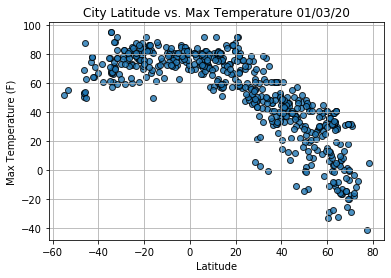

In [17]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

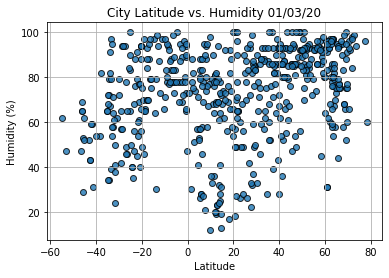

In [18]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

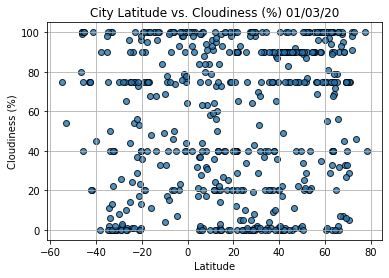

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

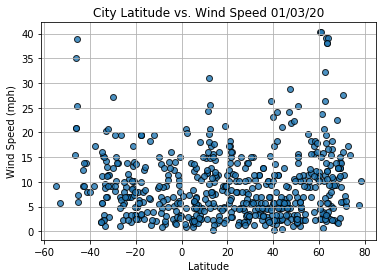

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()